<hr style="border:2px solid #808080"> </hr>
<center><h1 style="color:#03122E;"> Álgebra Lineal Numérica IMT2111</h1></center>
<center><h1 style="color:#173F8A;"> Capítulo 1: Diferencias finitas para el problema de Poisson</h3></center>
<center><h1 style="color:#0176DE;"> Prof. Manuel A. Sánchez</h3></center>
<hr style="border:2px solid #808080"> </hr>



## **Tabla de contenidos**

1. [**Diferencias finitas 1d** - problema de Poisson](#Diferencias-Finitas-1d)
    1. [Solucion aproximada](#Grafica-1d)

2. [**Diferencias finitas 2d** - problema de Poisson](#Diferencias-Finitas-2d)
    1. [Grafica grilla 2d](#Grafica-de-la-grilla) 
    2. [Solucion aproximada](#Grafica-2d)

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from matplotlib import cm
from matplotlib.patches import Polygon
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Diferencias Finitas 1d

Problema de Poisson en un Intervalo:
\begin{equation}
-u''(x) = f(x),\quad \mbox{ en }(0,1), \qquad u(0) = u(1) = 0. 
\end{equation}

Metodo de diferencias finitas centradas: Malla $\{x_j\},\,0\geq j\geq n$, $x_j = j \Delta x$, $\Delta x = 1/n$. Encontrar $u_j$, $1\leq j \leq n-1$, y con $u_0=u_n=0$, soluci\'on de
\begin{equation}
\frac{-u_{j+1}+2u_j-u_{j-1}}{\Delta x^{2}} = f(x_j), \qquad 1\leq j \leq n-1.
\end{equation}

In [2]:
def diff1dmesh(a=0, b=1, n=5):
    deltax = (b-a)/n
    x = np.zeros(n+1, dtype=np.float64)
    for j in range(n+1):
        x[j] = a+j*deltax
    return x
def diff1dPoissonmatrix(a=0, b=1, n=5):
    deltax = (b-a)/n
    A = 2.0/(deltax**2)*np.eye(n-1) -1.0/(deltax**2)*np.diag(np.ones(n-2),-1) - 1.0/(deltax**2)*np.diag(np.ones(n-2),1)
    return A

# Problema de Poisson: -u'' = f 
ufun1D = lambda x: np.sin(2*np.pi*x)
f = lambda x: 4*np.pi**2*np.sin(2*np.pi*x)
# Grilla de diferencias finitas
n = 20
X = diff1dmesh(n=n)
# Matriz de diferencias finitas
A1d = diff1dPoissonmatrix(n=n)
# vector de diferencias finitas
b1d = np.asarray([f(X[j]) for j in range(1,n) ])

# Resolvermos el sistema lineal
u = np.zeros(n+1, dtype=np.float64)
u[1:n] = np.linalg.solve(A1d, b1d)

## Grafica

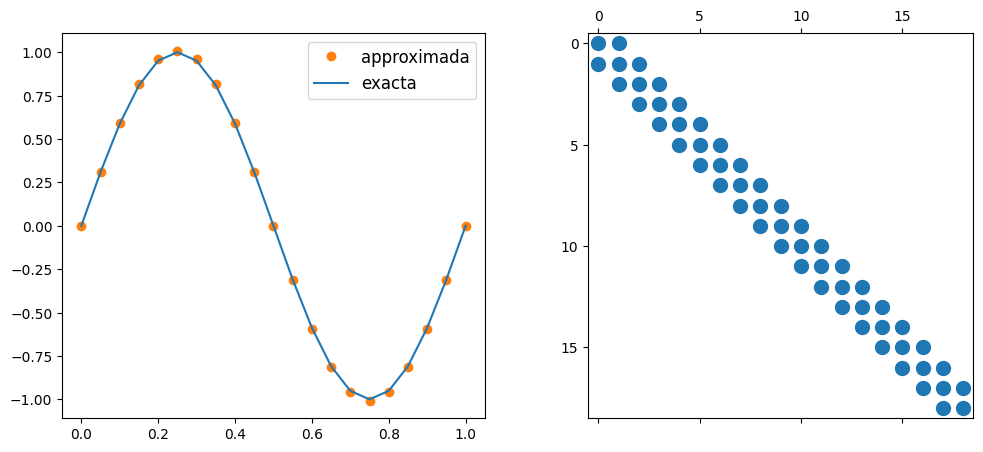

In [3]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[1].spy(A1d,  marker='o')
ax[0].plot(X, u,color='C01', marker='o', linestyle='None', label='approximada')
ax[0].plot(X, ufun1D(X), label='exacta')
ax[0].legend(loc="best", fontsize=12)
plt.show()

## Diferencias Finitas 2d
Problema de Poisson en el cuadrado unitario (0,1)^2:
\begin{equation}
-\Delta u(x,y) = f(x,y),\quad \mbox{ en }\Omega = (0,1)^{2}, \qquad u = 0, x=0 \vee x=1, \vee y = 0 \vee y=1. 
\end{equation}

Malla $\{x_i, y_{j}\}$. $u_{i,j} \approx u(x_i, y_j)$
\begin{equation}
- \frac{u_{i+1,j}+u_{i,j+1}-4u_{i,j} + u_{i-1,j}+u_{i,j-1} }{h^{2}} = f_{ij}, \quad 1\leq i,j,\leq n-1
\end{equation}
y
\begin{equation}
u_{i,j} = 0, \quad \{i=0 \vee j=0 \vee i=n \vee j=n \}
\end{equation}


In [4]:
# Problema de Poisson: -u_xx - u_yy = f
ufun2D = lambda x,y: np.sin(np.pi*x)*np.sin(np.pi*y)
f2D = lambda x,y: 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)

# Grilla de diferencias finitas
n = 8
nx, ny = n, n
lx, ly = 1.0, 1.0 
dx, dy = lx/(nx), ly/(ny)
npoints = (nx ) * (ny ) 
x = np.linspace(0, lx , nx+1) 
y = np.linspace(0, ly , ny+1) 

# Matriz de diferencias finitas Averiguar porque esto es cierto!
Ix = np.eye(nx-1)
Iy = np.eye(ny-1)
A1dx = diff1dPoissonmatrix(n=nx) 
A1dy = diff1dPoissonmatrix(n=ny)
A2d = np.kron(A1dx, Iy) + np.kron(Ix,A1dy)

# vector de diferencias finitas
b = np.zeros((nx+1,ny+1))
USOL = np.zeros((nx+1, ny+1, 1 ))
Dirichletnode=[]
k=0
X = np.zeros((nx+1 , ny+1))
Y = np.zeros((nx+1 , ny+1))
for j in range(ny+1):
    for i in range(nx+1):
        X[i,j] = x[i]
        Y[i,j] = y[j]
        USOL[i,j,0] = ufun2D(x[i],y[j])
        # Not on the boundary
        if i>0 and i <nx and j>0 and j<ny:
            b[i,j] = f2D(x[i],y[j])
        else:
            Dirichletnode.append(k)
        k+=1
b = b.reshape((nx+1)*(ny+1))
# Resolver el sistema lineal
Intnodes= np.setdiff1d(range((nx+1)*(ny+1)), Dirichletnode)
uhsol = np.zeros((nx+1)*(ny+1))
uhsol[Intnodes] = np.linalg.solve(A2d,dx**2*b[Intnodes])

## Grafica de la grilla

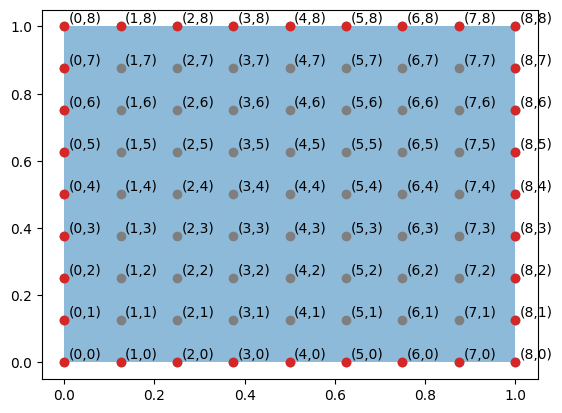

In [5]:
# Grafica de grilla 
polygon1 = Polygon([(0,0), (1,0), (1,1), (0,1)], alpha = 0.5)
fig = plt.figure()
epsi = 0.01
ax = fig.add_subplot(111)
ax.add_patch(polygon1)
ax.plot(X,Y,'o', color='C07')
ax.plot
for i in range(nx+1):
    for j in range(nx+1):
        txt = '('+str(i)+','+str(j)+')'
        ax.annotate(txt, (x[i]+epsi, y[j]+epsi))
        if i == 0 or j ==0 or i ==nx or j == ny:
            ax.plot(x[i],y[j],'o',color='C03')
plt.show()

## Grafica 2d

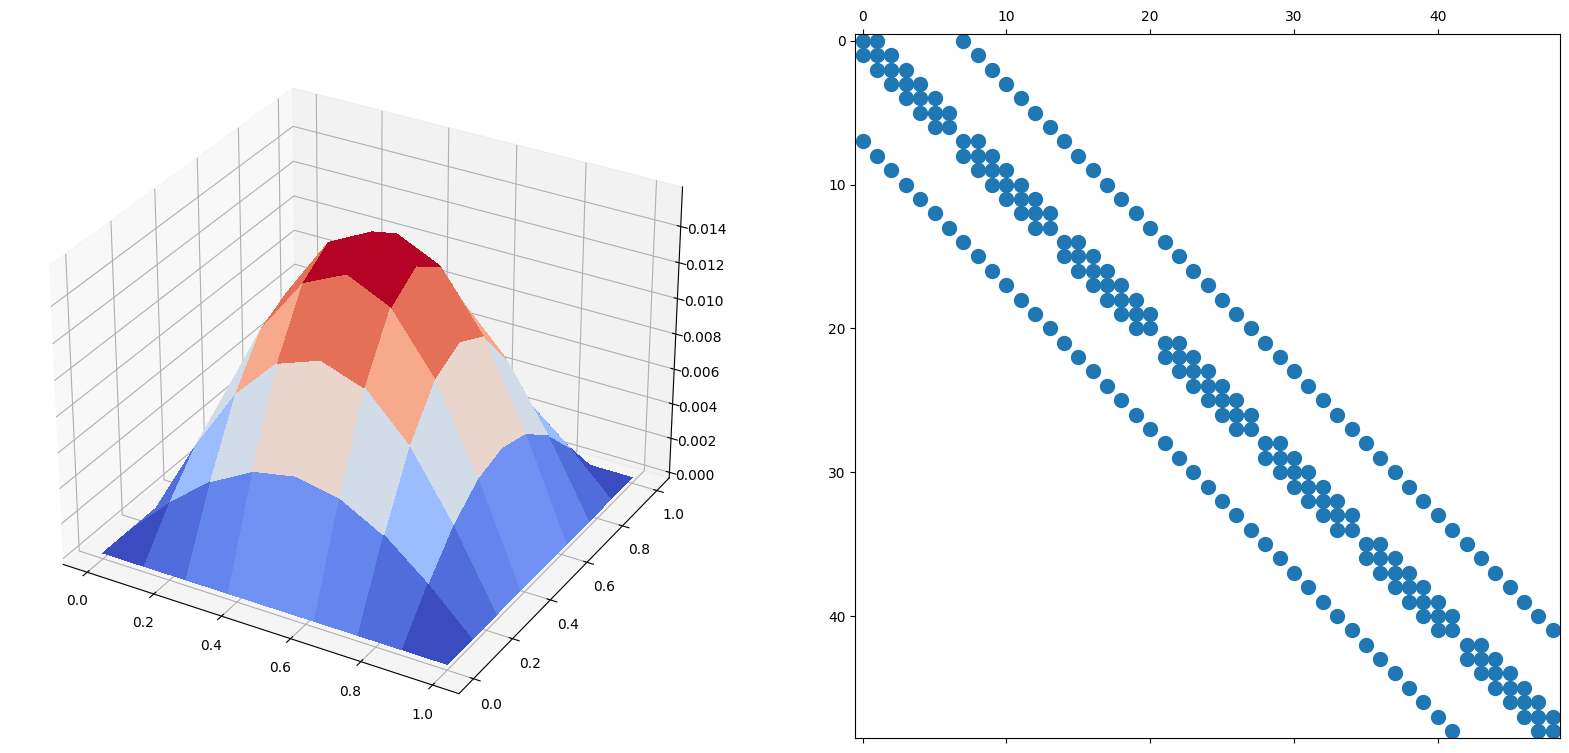

In [6]:
Uhsol = uhsol.reshape((nx+1,ny+1))
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(121, projection='3d')
# Plot the surface.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, Uhsol, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax2 = fig.add_subplot(122)
ax2.spy(A2d, marker='o')
plt.show()

## Diferencias Finitas 2d
Problema de Poisson en el cuadrado unitario (0,1)^2:
\begin{equation}
-\Delta u(x,y,z) = f(x,y,z),\quad \mbox{ en }\Omega = (0,1)^{3}, \qquad u = 0, x=0 \vee x=1, \vee y = 0 \vee y=1 \vee z=0 \vee z=1. 
\end{equation}

Malla $\{x_i, y_{j}, z_{k}\}$. $u_{i,j,k} \approx u(x_i, y_j, z_{k})$
##  Solver 3D problem
\begin{equation}
-\frac{u_{i+1,j,k}+u_{i,j+1,k}+u_{i,j,k+1}-6u_{i,j,k} + u_{i-1,j,k}+u_{i,j-1,k}+u_{i,j,k-1}}{h^{2}} = f_{i,j,k}
\end{equation}

\begin{equation}
u(x,y,z) = \sin(\pi x)\sin(\pi y)\sin(\pi z)
\end{equation}
\begin{equation}
f(x,y,z) = 3\pi^{2}\sin(\pi x)\sin(\pi y)\sin(\pi z)
\end{equation}


In [7]:
# # Problema de Poisson 3d: -u_xx -u_yy-u_zz = f

# ufun3D =  lambda x,y,z: np.sin(np.pi*x)*np.sin(np.pi*y)*np.sin(np.pi*z)
# f3D = lambda x,y,z: 3*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)*np.sin(np.pi*z)

# # Malla
# n = 4
# nx, ny, nz = n, n, n
# lx, ly, lz = 1.0, 1.0, 1.0 
# dx, dy, dz = lx/(nx), ly/(ny), lz/(nz)
# npoints = (nx+1) * (ny+1) * (nz+1) 
# x = np.linspace(0, lx , nx+1) 
# y = np.linspace(0, ly , ny+1) 
# z = np.linspace(0, lz , nz+1)
# Ix = np.eye(nx-1); Iy = np.eye(ny-1); Iz = np.eye(nz-1)
# A1d = diff1dPoissonmatrix(n=nx)
# A3d = np.kron(np.kron(A1d,Iy),Iz)+np.kron(np.kron(Ix,A1d),Iz)+np.kron(np.kron(Ix,Iy),A1d)


# b3D = np.zeros((nx+1,ny+1,nz+1))
# USOL3D = np.zeros(( nx+1, ny+1, nz+1 ))
# Uhplot3D = np.zeros(( nx+1, ny+1, nz+1 ))
# Dirichletnode=[]
# ele=0
# for k in range(nz+1):
#     for j in range(ny+1):
#         for i in range(nx+1):
#             Xplot[i,j,k] = x[i]
#             Yplot[i,j,k] = y[j]
#             Zplot[i,j,k] = z[k]
#             USOL3D[i,j,k] = ufun3D(x[i],y[j],z[k])
#             # Not on the boundary
#             if i>0 and i <nx and j>0 and j<ny and k>0 and k<nz:
#                 b3D[i-1,j-1,k-1] = f3D(x[i],y[j],z[k])
#             else:
#                 Dirichletnode.append(ele)
#             ele+=1
# b3D = b3D.reshape((nx+1)*(ny+1)*(nz+1))

# Intnodes= np.setdiff1d(range((nx+1)*(ny+1)*(nz+1)), Dirichletnode)
# uhsol = np.zeros((nx+1)*(ny+1)*(nz+1))

# uhsol[Intnodes] = np.linalg.solve(A3D,dx**2*b[Intnodes])
# Uhsol = uhsol.reshape((nx+1,ny+1,nz+1))


In [8]:

# Xplot = np.zeros(( nx+1, ny+1, nz+1 ))
# Yplot = np.zeros(( nx+1, ny+1, nz+1 ))
# Zplot = np.zeros(( nx+1, ny+1, nz+1 ))






In [9]:
# import numpy as np
# %pip install plotly
# import plotly.graph_objects as go
# # from IPython